In [92]:
{"tags": ["hide-output" ]}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In this very simple example, we will train a deep neural network (DNN) to classify flower species on the well-known [Iris](https://archive.ics.uci.edu/ml/datasets/iris) dataset. We will then demonstrate how `snapshot_ensemble` may be used to automatically save the neural network at several points during training, in order to generate an ensemble of models at the cost of training a single one.

## Data

In [93]:
# Read Iris Dataset from UCI Repository
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


There are 150 samples in this dataset, with 4 features corresponding to the length and width of the flower characteristics. The outcome variable is categorical, corresponding to 3 species of Iris flowers, which we will one-hot-encode.

In [37]:
# Prepare features/targets for supervised learning
X, targets = df.iloc[:,:4], df.iloc[:,-1]
N, numFeatures = X.shape

# One-hot-encode targets
targetEnc = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
numOutcomes = len(targetEnc)
Y = np.zeros((N, numOutcomes))
for n,outcome in enumerate(targets):
    Y[n, targetEnc.index( outcome ) ] = 1

## Model

We will first train the DNN as usual, using a very small architecture given the data size with standard cross-entropy loss.

In [34]:
import tensorflow as tf
import tensorflow.keras as tfk

def CompileDNNModel(numFeatures=4, numOutcomes=3, architecture=[6,6]):
    x = tfk.Input(shape=(numFeatures,))
    f = x
    for nodes in architecture:
        f = tfk.layers.Dense(nodes, activation='relu')(f)
    f = tfk.layers.Dense(numOutcomes, activation='softmax')(f)
    
    model = tfk.Model(inputs=x, outputs=f)
    model.compile(
        loss=tfk.losses.CategoricalCrossentropy(from_logits=False),
        optimizer=tfk.optimizers.Adam(),
    )
    return model

In [67]:
# Train the model
architecture = [6,6]
model = CompileDNNModel(numFeatures=numFeatures, numOutcomes=numOutcomes, architecture=architecture)
lossHistory = model.fit(X, Y, 
                        batch_size=50,
                        epochs=500,
                        shuffle=True
                       )

Epoch 1/500
3/3 [==============================] - 0s 6ms/step - loss: 4.8484
Epoch 2/500
3/3 [==============================] - 0s 7ms/step - loss: 4.6209
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 4.4069
Epoch 4/500
3/3 [==============================] - 0s 8ms/step - loss: 4.1905
Epoch 5/500
3/3 [==============================] - 0s 8ms/step - loss: 3.9901
Epoch 6/500
3/3 [==============================] - 0s 8ms/step - loss: 3.7963
Epoch 7/500
3/3 [==============================] - 0s 8ms/step - loss: 3.6082
Epoch 8/500
3/3 [==============================] - 0s 9ms/step - loss: 3.4263
Epoch 9/500
3/3 [==============================] - 0s 8ms/step - loss: 3.2587
Epoch 10/500
3/3 [==============================] - 0s 8ms/step - loss: 3.1067
Epoch 11/500
3/3 [==============================] - 0s 8ms/step - loss: 2.9670
Epoch 12/500
3/3 [==============================] - 0s 3ms/step - loss: 2.8340
Epoch 13/500
3/3 [==============================] - 0s 3ms/st

3/3 [==============================] - 0s 2ms/step - loss: 0.7811
Epoch 207/500
3/3 [==============================] - 0s 3ms/step - loss: 0.7774
Epoch 208/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7740
Epoch 209/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7709
Epoch 210/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7676
Epoch 211/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7644
Epoch 212/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7612
Epoch 213/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7581
Epoch 214/500
3/3 [==============================] - 0s 2ms/step - loss: 0.7552
Epoch 215/500
3/3 [==============================] - 0s 3ms/step - loss: 0.7521
Epoch 216/500
3/3 [==============================] - 0s 3ms/step - loss: 0.7489
Epoch 217/500
3/3 [==============================] - 0s 3ms/step - loss: 0.7458
Epoch 218/500
3/3 [==============================] - 0

3/3 [==============================] - 0s 3ms/step - loss: 0.4673
Epoch 411/500
3/3 [==============================] - 0s 4ms/step - loss: 0.4664
Epoch 412/500
3/3 [==============================] - 0s 3ms/step - loss: 0.4656
Epoch 413/500
3/3 [==============================] - 0s 3ms/step - loss: 0.4648
Epoch 414/500
3/3 [==============================] - 0s 4ms/step - loss: 0.4641
Epoch 415/500
3/3 [==============================] - 0s 3ms/step - loss: 0.4633
Epoch 416/500
3/3 [==============================] - 0s 4ms/step - loss: 0.4625
Epoch 417/500
3/3 [==============================] - 0s 3ms/step - loss: 0.4616
Epoch 418/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4608
Epoch 419/500
3/3 [==============================] - 0s 5ms/step - loss: 0.4600
Epoch 420/500
3/3 [==============================] - 0s 5ms/step - loss: 0.4592
Epoch 421/500
3/3 [==============================] - 0s 3ms/step - loss: 0.4585
Epoch 422/500
3/3 [==============================] - 0

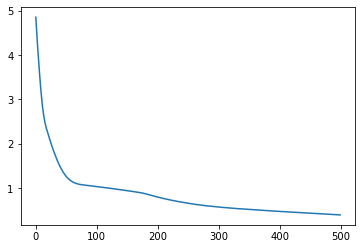

In [68]:
# Loss history
plt.plot(lossHistory.history['loss'])

In [73]:
# Make predictions
Y_hat = model.predict(X)

# Evaluate model
from sklearn.metrics import classification_report
print(classification_report(np.argmax(Y, axis=-1), np.argmax(Y_hat, axis=-1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.74      0.85        50
           2       0.79      1.00      0.88        50

    accuracy                           0.91       150
   macro avg       0.93      0.91      0.91       150
weighted avg       0.93      0.91      0.91       150



We can see that the model performance is fairly good after 500 epochs, with accuracy at 91% and reasonably high precision and recall. 

### Model (Snapshot Ensemble)

Now we will demonstrate how to use `snapshot_ensemble` to generate an ensemble of trained DNNs at the cost of a single training period. The DNN will be trained with cosine annealing, and here we just use the default hyperparameters which we can visualize below:

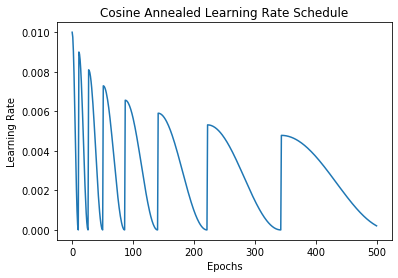

In [98]:
from snapshot_ensemble import *
VisualizeLR(cycle_length=10, cycle_length_multiplier=1.5, lr_multiplier=0.9, lr_init=0.01, lr_min=1e-6)

To do this, we simply pass in `SnapshotEnsembleCallback` into the `callbacks` argument when training. If validation data is supplied and we wished to also save the "best" model that minimizes validation loss, we may also use the helper function `GenerateSnapshotCallbacks()` that includes both `SnapshotEnsembleCallback` and `ModelCheckpoint`. By default, these models are saved into `Ensemble/` in the current working directory.

In [77]:
# Compile the DNN model
architecture = [6,6]
model = CompileDNNModel(numFeatures=numFeatures, numOutcomes=numOutcomes, architecture=architecture)

# Snapshot Ensemble callbacks
callbacks = [
    # Note: See `help(SnapshotEnsembleCallback)` for documentation on the hyperparameters
    SnapshotEnsembleCallback(cycle_length=10, cycle_length_multiplier=1.5, lr_multiplier=0.9, lr_init=0.01, lr_min=1e-6),   
]

# Train the model with cosine annealing + snapshot ensemble
lossHistory = model.fit(X, Y, 
                        batch_size=50,
                        epochs=500,
                        callbacks=callbacks,
                        shuffle=True
                       )

Saving ensembled models to Ensemble/.
Epoch 1/500
3/3 [==============================] - 0s 8ms/step - loss: 3.1956
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 2.2998
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 1.7628
Epoch 4/500
3/3 [==============================] - 0s 10ms/step - loss: 1.4609
Epoch 5/500
3/3 [==============================] - 0s 7ms/step - loss: 1.2729
Epoch 6/500
3/3 [==============================] - 0s 8ms/step - loss: 1.1654
Epoch 7/500
3/3 [==============================] - 0s 4ms/step - loss: 1.1039
Epoch 8/500
3/3 [==============================] - 0s 5ms/step - loss: 1.0680
Epoch 9/500
3/3 [==============================] - 0s 9ms/step - loss: 1.0545
Epoch 10/500
3/3 [==============================] - 0s 7ms/step - loss: 1.0496
Epoch 11/500
3/3 [==============================] - 0s 7ms/step - loss: 1.0228
Epoch 12/500
3/3 [==============================] - 0s 8ms/step - loss: 0.9506
Epoch 13/500
3/3 [====

3/3 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 204/500
3/3 [==============================] - 0s 3ms/step - loss: 0.0704
Epoch 205/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 206/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0704
Epoch 207/500
3/3 [==============================] - 0s 3ms/step - loss: 0.0704
Epoch 208/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0704
Epoch 209/500
3/3 [==============================] - 0s 6ms/step - loss: 0.0717
Epoch 210/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0725
Epoch 211/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0731
Epoch 212/500
3/3 [==============================] - 0s 3ms/step - loss: 0.0679
Epoch 213/500
3/3 [==============================] - 0s 3ms/step - loss: 0.0723
Epoch 214/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0714
Epoch 215/500
3/3 [==============================] - 0

3/3 [==============================] - 0s 3ms/step - loss: 0.0520
Epoch 408/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0531
Epoch 409/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0524
Epoch 410/500
3/3 [==============================] - 0s 3ms/step - loss: 0.0523
Epoch 411/500
3/3 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 412/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0531
Epoch 413/500
3/3 [==============================] - 0s 5ms/step - loss: 0.0526
Epoch 414/500
3/3 [==============================] - 0s 3ms/step - loss: 0.0521
Epoch 415/500
3/3 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 416/500
3/3 [==============================] - 0s 4ms/step - loss: 0.0531
Epoch 417/500
3/3 [==============================] - 0s 3ms/step - loss: 0.0525
Epoch 418/500
3/3 [==============================] - 0s 3ms/step - loss: 0.0537
Epoch 419/500
3/3 [==============================] - 0

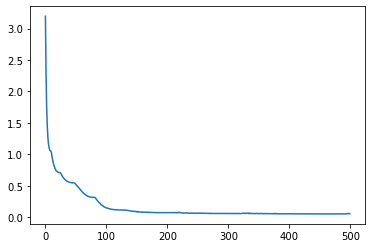

In [79]:
# Loss history
plt.plot(lossHistory.history['loss'])

After training, we will load the saved models from `Ensemble/` to be used as part of an ensemble. For simplicity, we will use uniform weights and average each model's estimates.

In [81]:
# Load in snapshotted models as an ensemble
import glob
models = []
for file in glob.glob('Ensemble/*.h5'):
    mod = CompileDNNModel(numFeatures=numFeatures, numOutcomes=numOutcomes, architecture=architecture)
    mod.load_weights( file )
    models.append( mod )

In [89]:
# Make ensembled predictions
Y_hat_ens = []
for mod in models:
    Y_hat_k = mod.predict( X )
    Y_hat_ens.append( Y_hat_k )

# Ensemble with simple uniform weights
Y_hat_ens = np.mean(Y_hat_ens, axis=0)

In [90]:
# Evaluate model
print(classification_report(np.argmax(Y, axis=-1), np.argmax(Y_hat_ens, axis=-1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



We can see that accuracy has improved to 97% with much better f1-scores. Note that the hyperparameters of the learning rate schedule can be important and the default values are likely suboptimal for your task - they will require some hyperparameter tuning and understanding of the loss surface.